# Acquiring Data

In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074739,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471445,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012115,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040899,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157440,283192000


## Simple plots

Text(0, 0.5, 'Prices ($)')

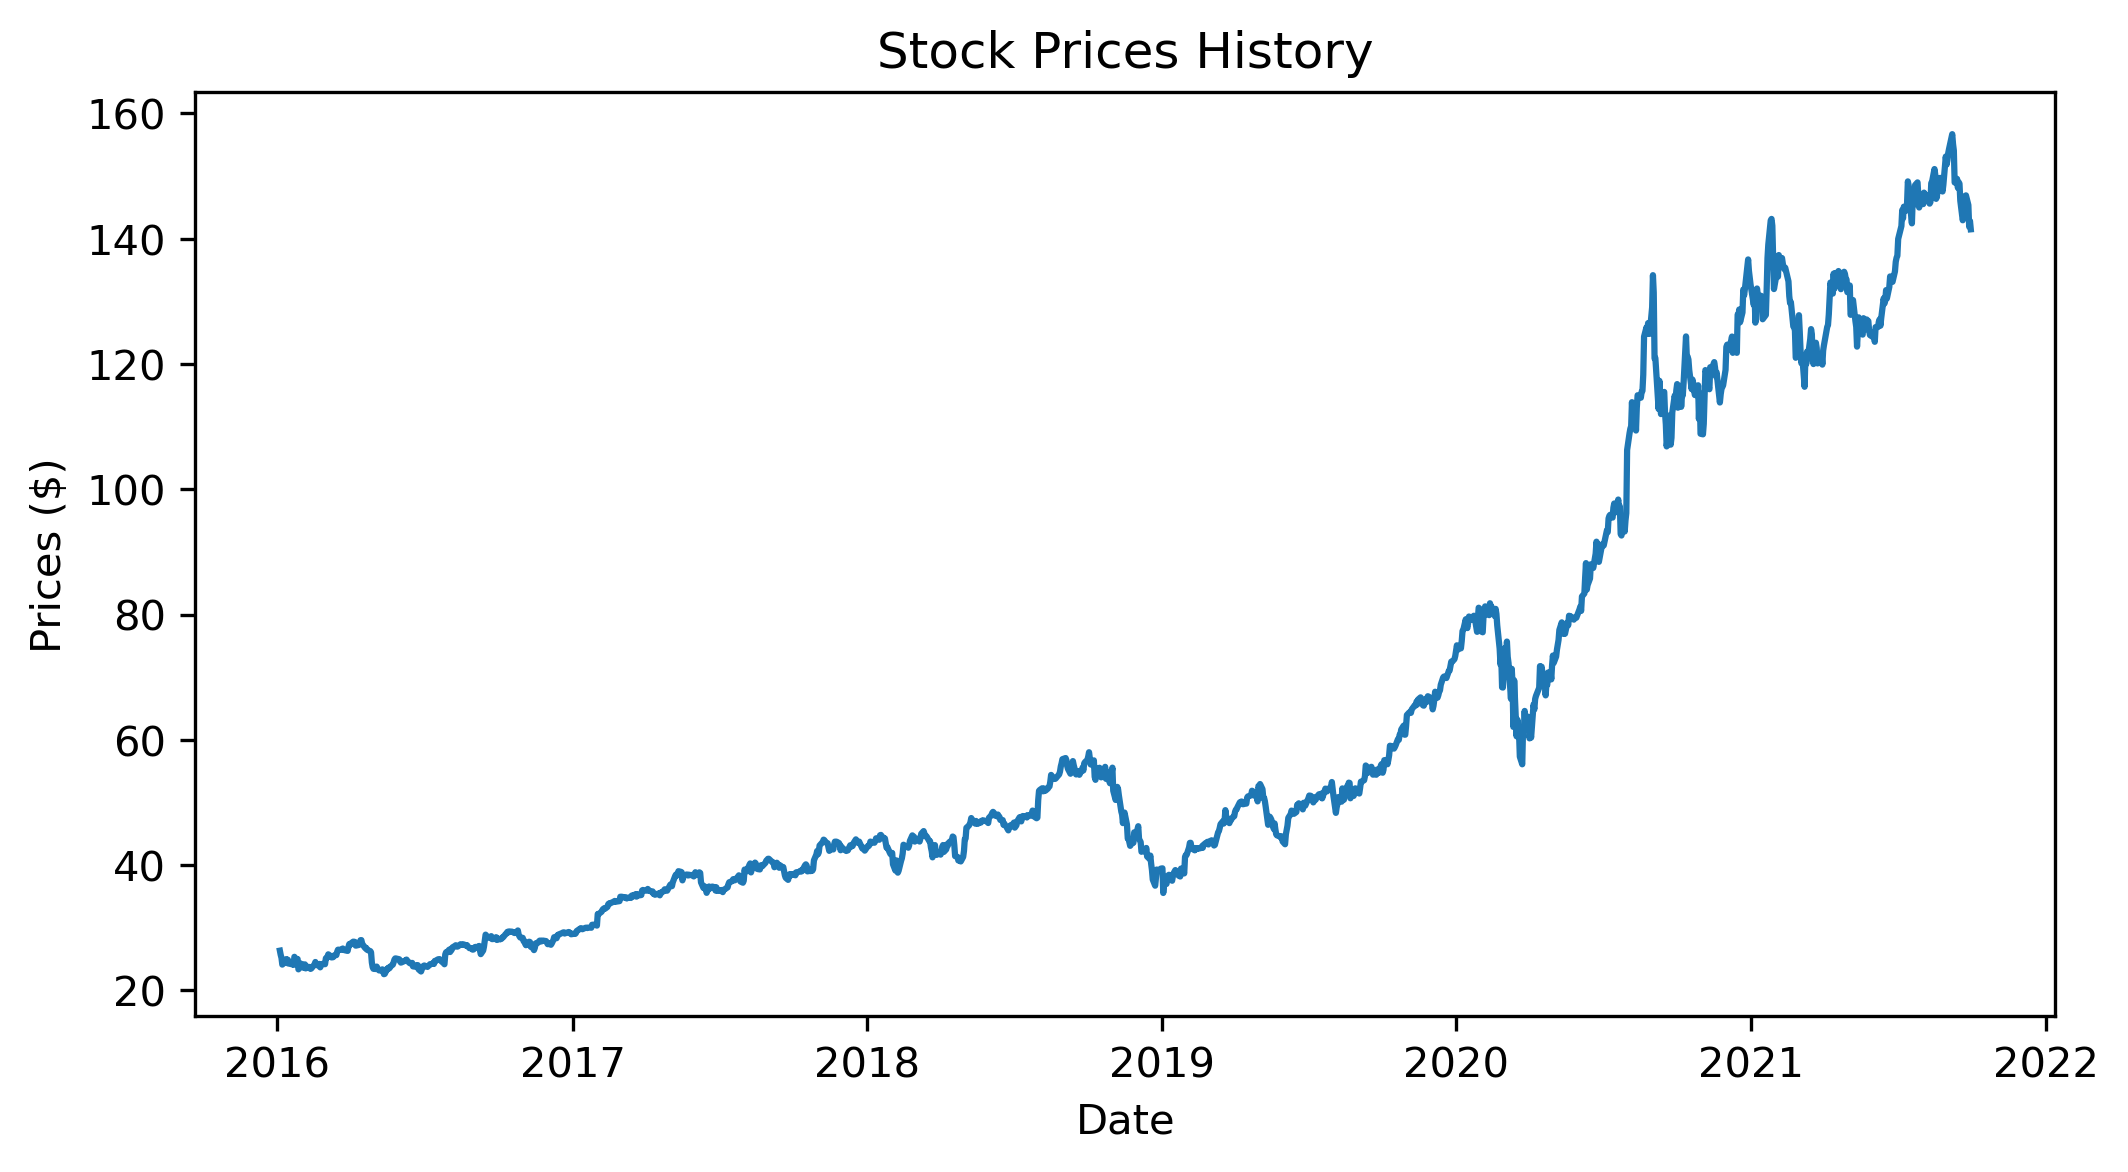

In [2]:
plt.figure(figsize=(8, 4), dpi=300)
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

# Train-Test Split

## Train set

In [3]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

In [5]:
train_data

array([[0.02798181],
       [0.02306029],
       [0.01931323],
       ...,
       [0.65230602],
       [0.68094027],
       [0.66013573]])

Training set (last 60 days)

- `x_train` $:=[x_{t-60}:x_{t-1}]$
- `y_train` $:=x_t$

In [4]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.02798181, 0.02306029, 0.01931323, ..., 0.02768354, 0.03232542,
        0.03583013],
       [0.02306029, 0.01931323, 0.01139033, ..., 0.03232542, 0.03583013,
        0.03476753],
       [0.01931323, 0.01139033, 0.01234108, ..., 0.03583013, 0.03476753,
        0.03663175],
       ...,
       [0.41883227, 0.4121211 , 0.40511165, ..., 0.62395139, 0.64391707,
        0.64934193],
       [0.4121211 , 0.40511165, 0.40863504, ..., 0.64391707, 0.64934193,
        0.65230602],
       [0.40511165, 0.40863504, 0.4052235 , ..., 0.64934193, 0.65230602,
        0.68094027]])

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.02798181],
        [0.02306029],
        [0.01931323],
        ...,
        [0.02768354],
        [0.03232542],
        [0.03583013]],

       [[0.02306029],
        [0.01931323],
        [0.01139033],
        ...,
        [0.03232542],
        [0.03583013],
        [0.03476753]],

       [[0.01931323],
        [0.01139033],
        [0.01234108],
        ...,
        [0.03583013],
        [0.03476753],
        [0.03663175]],

       ...,

       [[0.41883227],
        [0.4121211 ],
        [0.40511165],
        ...,
        [0.62395139],
        [0.64391707],
        [0.64934193]],

       [[0.4121211 ],
        [0.40511165],
        [0.40863504],
        ...,
        [0.64391707],
        [0.64934193],
        [0.65230602]],

       [[0.40511165],
        [0.40863504],
        [0.4052235 ],
        ...,
        [0.64934193],
        [0.65230602],
        [0.68094027]]])

In [9]:
y_train

array([0.03476753, 0.03663175, 0.03873831, ..., 0.65230602, 0.68094027,
       0.66013573])

In [10]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

# 每一天以前60天为数据为训练集
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Test set

In [11]:
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# LSTM model

In [12]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [14]:
?model.compile

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size= 1, epochs=3, verbose=1)

Epoch 1/3
1098/1098 [==============================] - 14s 11ms/step - loss: 1.2674e-04
Epoch 2/3
1098/1098 [==============================] - 12s 11ms/step - loss: 1.3297e-04
Epoch 3/3
1098/1098 [==============================] - 12s 11ms/step - loss: 1.0604e-04


In [16]:
history.history

{'loss': [0.0006604734226129949,
  0.0002102223370457068,
  0.00019996450282633305,
  0.00021485603065229952,
  0.00020268134539946914,
  0.00016126826812978834,
  0.00020054802007507533,
  0.00020083170966245234,
  0.000169716018717736,
  0.0001651454222155735,
  0.00015860656276345253,
  0.00016889853577595204,
  0.00015136311412788928,
  0.00017605445464141667,
  0.00017323745123576373,
  0.00012930530647281557,
  0.00016061696805991232,
  0.00014772509166505188,
  0.00012861937284469604,
  0.00013561233936343342,
  0.00011781509238062426,
  0.00012746510037686676,
  0.00015475452528335154,
  0.000128911342471838,
  0.00014766232925467193,
  0.00012646101822610945,
  0.00012990825052838773,
  0.0001317177520832047,
  0.00012011096259811893,
  0.00013205097639001906],
 'accuracy': [0.0009107468067668378,
  0.0009107468067668378,
  0.0009107468067668378,
  0.0009107468067668378,
  0.0009107468067668378,
  0.0009107468067668378,
  0.0009107468067668378,
  0.0009107468067668378,
  0.000

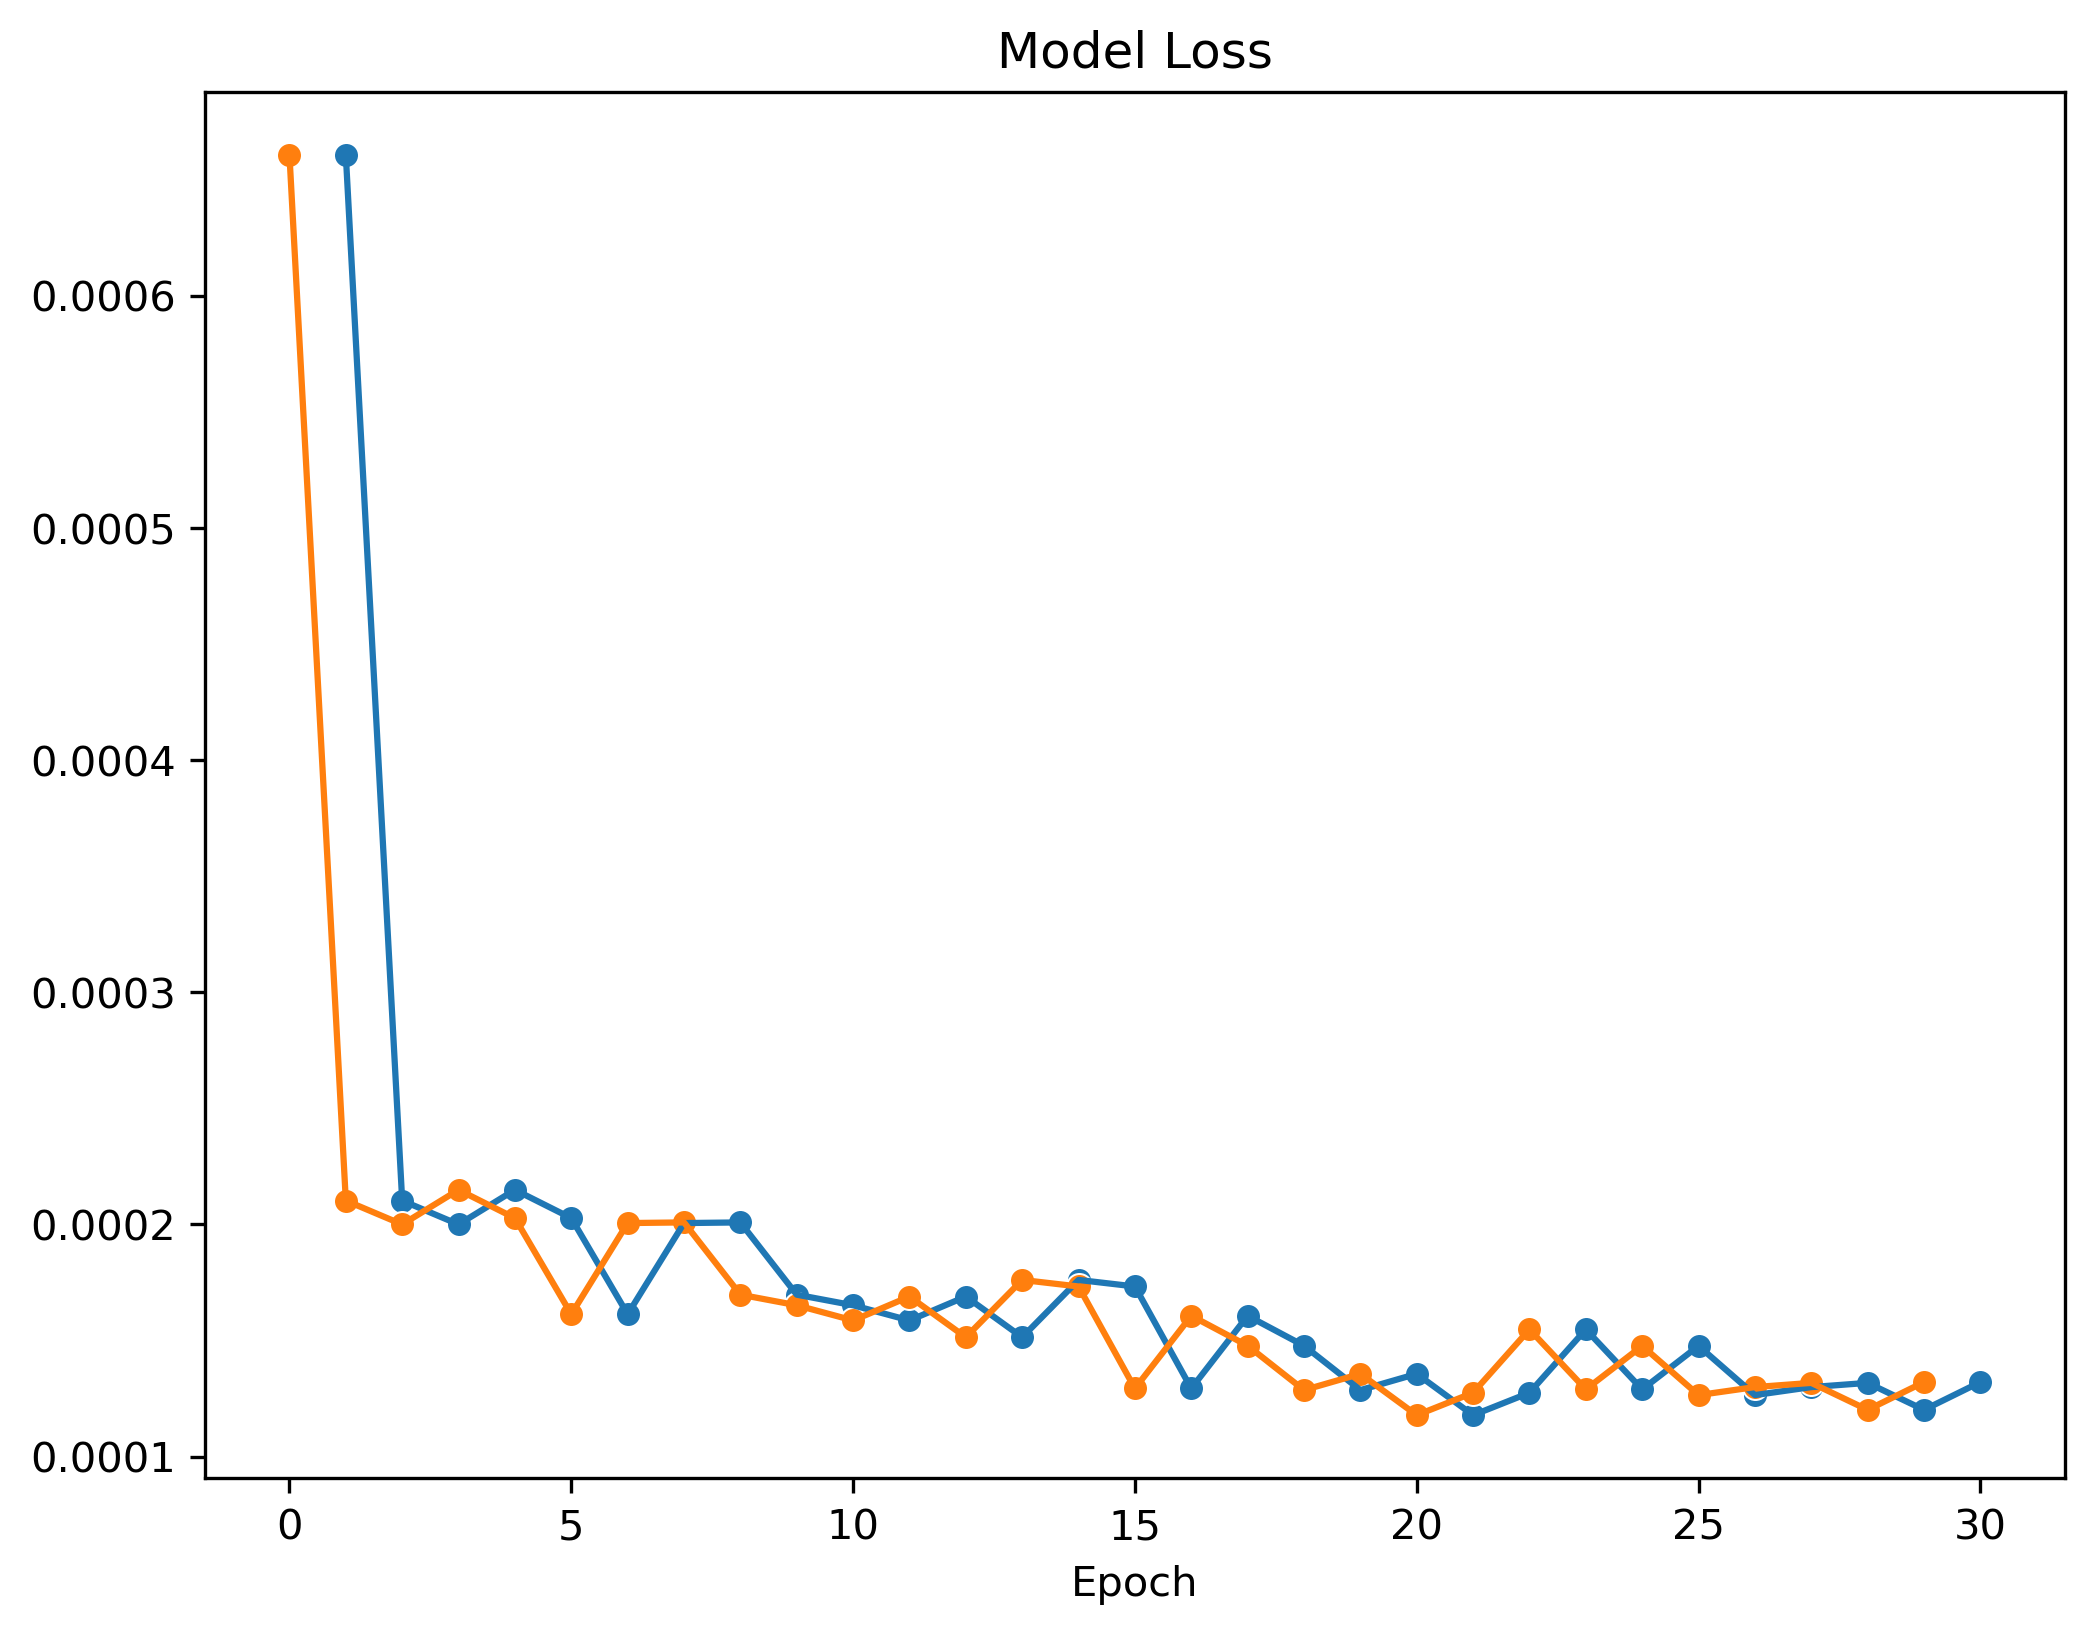

In [32]:
import seaborn as sns
import tikzplotlib
def print_history(history):
    # 绘制训练 & 验证的准确率值
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
    plt.figure(figsize=(8,6),dpi=300)
    sns.lineplot([i for i in range(1, 31)], history.history['loss'])
    sns.scatterplot([i for i in range(1, 31)], history.history['loss'])
    plt.plot(history.history['mse'])
    sns.scatterplot([i for i in range(0, 30)], history.history['mse'])
    # plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
#     plt.legend(['Train_acc', 'Val_acc', 'Train_loss', 'Val_loss'])
    tikzplotlib.save('loss.tex')
    plt.show()

print_history(history)

In [36]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 1s 17ms/step


2.8300103580250457

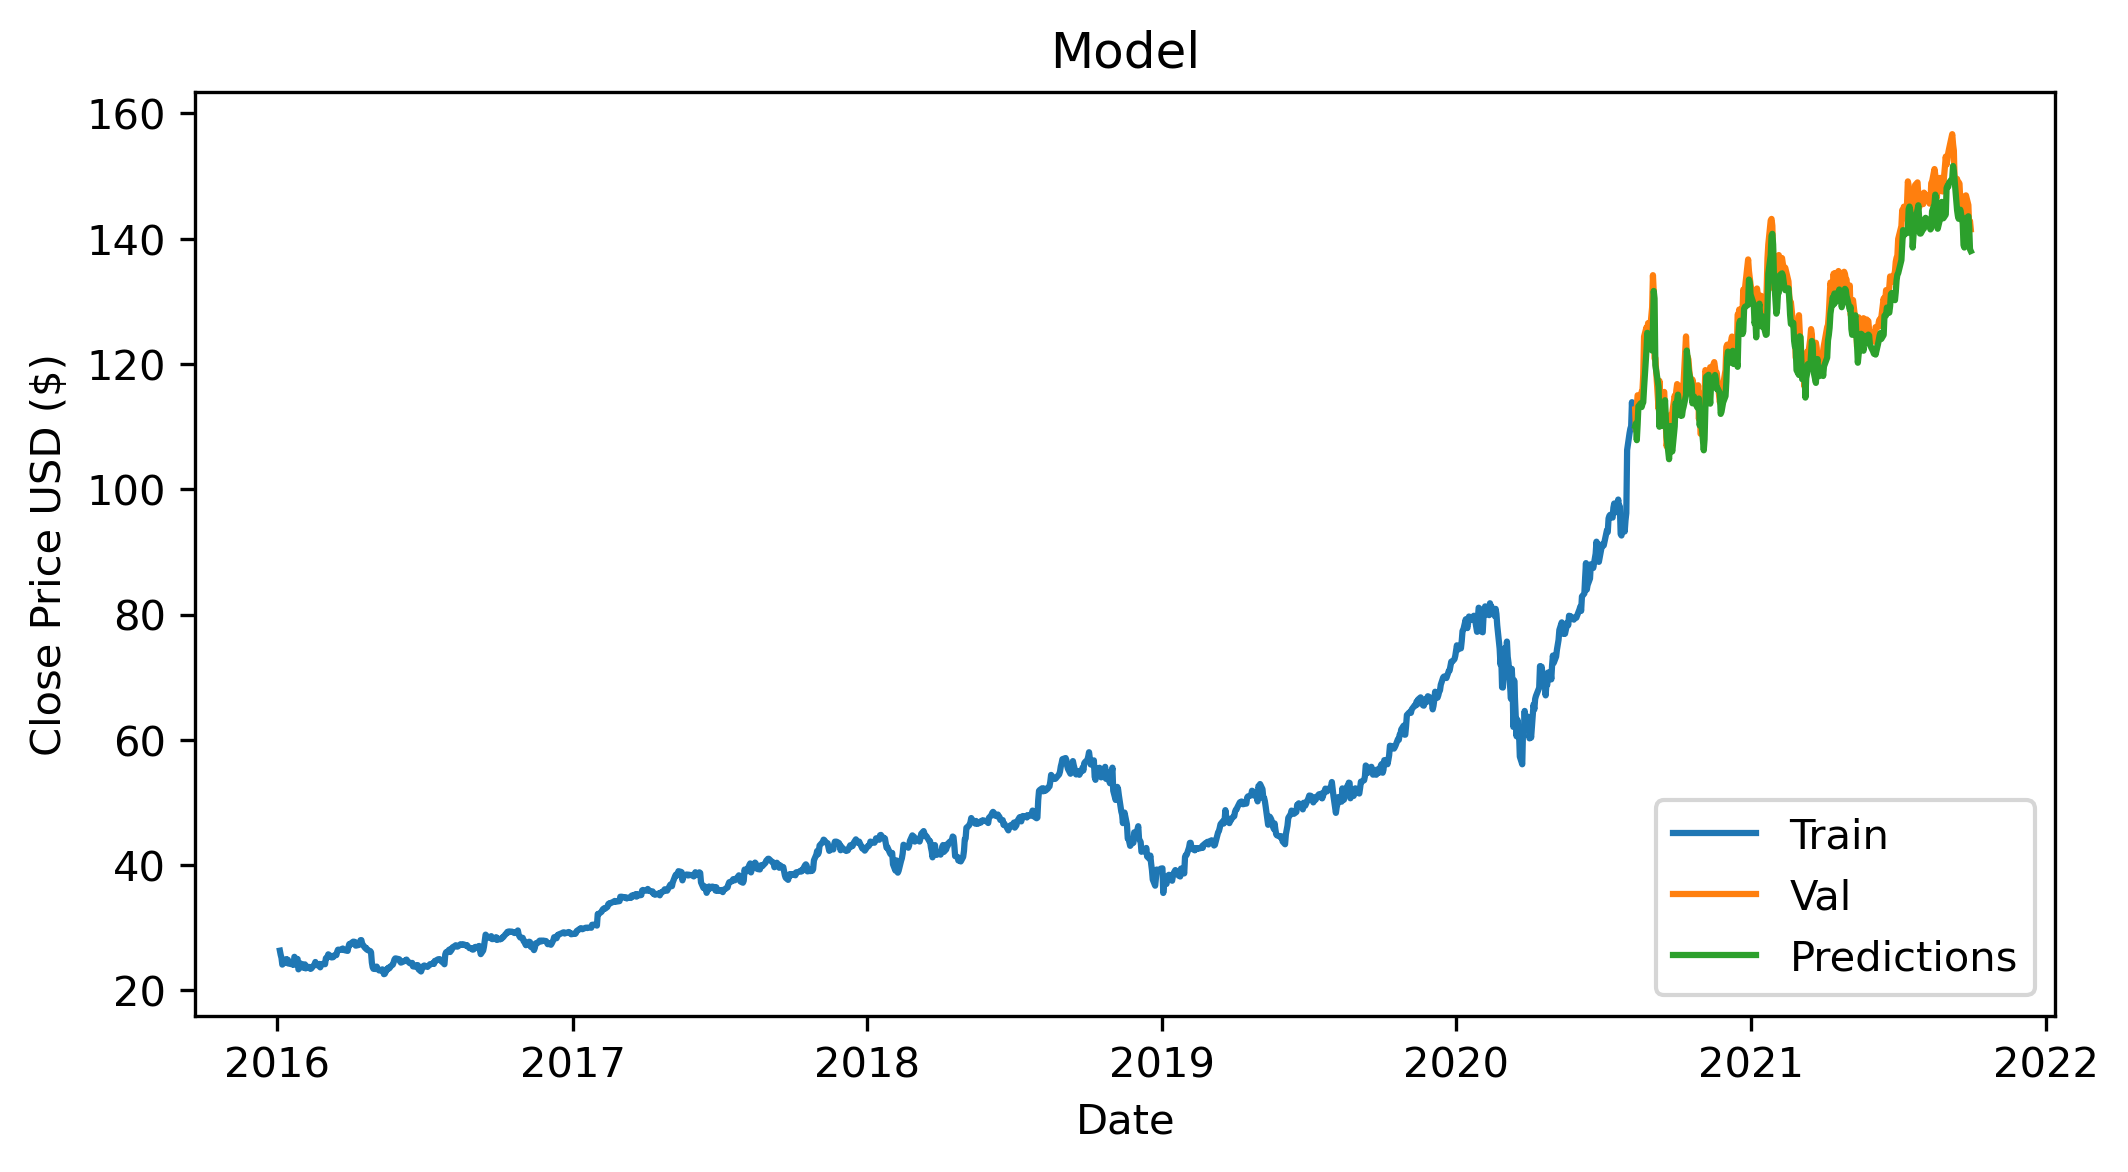

In [40]:
plt.figure(dpi=300, figsize=(8,4))
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
tikzplotlib.save('pred.tex')
plt.show()

In [15]:
predictions

array([[107.50389 ],
       [107.9793  ],
       [107.06702 ],
       [107.62232 ],
       [109.08768 ],
       [110.23285 ],
       [110.82285 ],
       [111.466286],
       [111.95749 ],
       [113.22765 ],
       [116.5169  ],
       [119.57291 ],
       [121.035126],
       [122.24984 ],
       [122.35446 ],
       [122.13152 ],
       [123.58323 ],
       [126.85507 ],
       [128.21863 ],
       [124.645004],
       [121.50752 ],
       [116.57619 ],
       [114.95311 ],
       [113.24459 ],
       [111.695694],
       [112.05742 ],
       [112.746605],
       [111.94113 ],
       [110.40726 ],
       [107.92688 ],
       [107.34677 ],
       [107.9971  ],
       [106.90118 ],
       [106.23775 ],
       [107.382324],
       [109.45911 ],
       [110.60414 ],
       [111.73181 ],
       [112.750626],
       [111.90847 ],
       [112.293076],
       [111.51862 ],
       [111.54556 ],
       [111.70267 ],
       [112.61199 ],
       [116.171196],
       [117.69059 ],
       [118.2